True


Text(0.5, 1.0, 'PCA 2D')

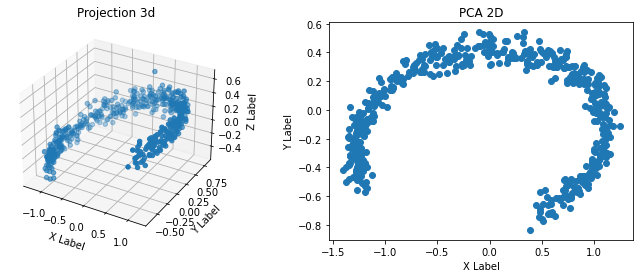

In [70]:
#Conducting some PCA
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

np.random.seed(4)
m = 500
w1, w2 = 0.1, 0.3
noise = 0.1
angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m)/2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title("Projection 3d")

X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)

m, n = X.shape
#Rows of S has to match columns of U for matrix multiplication
S = np.zeros(X_centered.shape)
S[:n, :n] = np.diag(s)
print(np.allclose(X_centered, U.dot(S).dot(Vt)))

#Now reduce the training set
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)
X2D_using_svd = X2D

X2D_using_svd.shape
ax = fig.add_subplot(122)
ax.scatter(X2D_using_svd[:, 0], X2D_using_svd[:, 1])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_title("PCA 2D")

Text(0.5, 1.0, 'PCA SciKit 2D (Notice the rotation)')

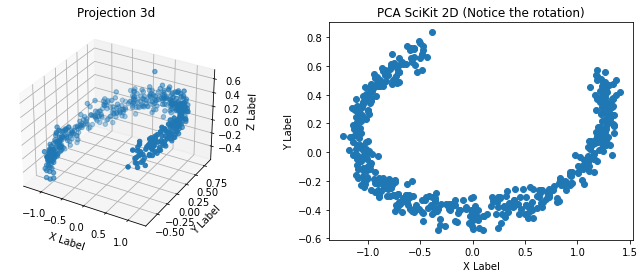

In [71]:
#The same, but with Scikit
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title("Projection 3d")

ax = fig.add_subplot(122)
ax.scatter(X2D[:, 0], X2D[:, 1])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_title("PCA SciKit 2D (Notice the rotation)")

Text(0.5, 1.0, 'PCA SciKit 2D Kernel')

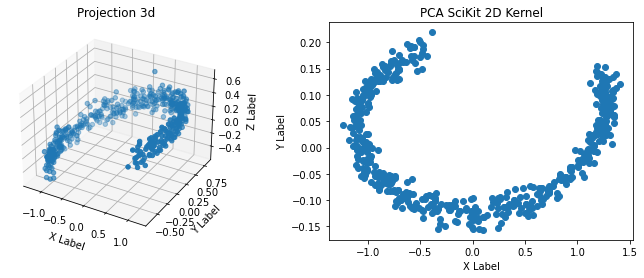

In [72]:
#Using the kernel PCA to unroll
from sklearn.decomposition import KernelPCA
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title("Projection 3d")

ax = fig.add_subplot(122)
ax.scatter(X2D[:, 0], X_reduced[:, 1])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_title("PCA SciKit 2D Kernel")

Text(0.5, 1.0, 'PCA SciKit 2D Kernel')

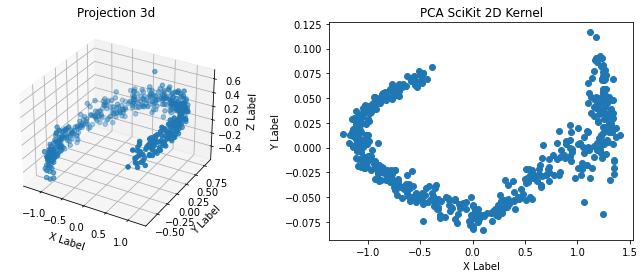

In [73]:
#Searching for best kernel (can't seem to get it to work)
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression
# from sklearn.pipeline import Pipeline
# clf = Pipeline([
#         ("kpca", KernelPCA(n_components=2)),
#         ("log_reg", LogisticRegression())
#     ])
# param_grid = [{
#         "kpca__gamma": np.linspace(0.03, 0.05, 10),
#         "kpca__kernel": ["rbf", "sigmoid"]
#     }]

# grid_search = GridSearchCV(clf, param_grid, cv=3)
# grid_search.fit(X, y)
# print(grid_search.best_params_)

#Instead let's use Locally Linear Embedding (LLE)
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced = lle.fit_transform(X)

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title("Projection 3d")

ax = fig.add_subplot(122)
ax.scatter(X2D[:, 0], X_reduced[:, 1])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_title("PCA SciKit 2D Kernel")

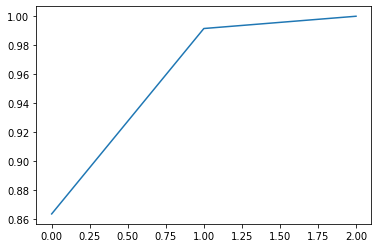

In [74]:
#Exploring other dimension numbers
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

#Can even tell scikit how much variance you want preserved
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

plt.plot([x for x in range(len(cumsum))], cumsum)

In [63]:
#Importing MNIST for another example
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
X = mnist['data']
y = mnist['target']
y = y.astype(np.uint8)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

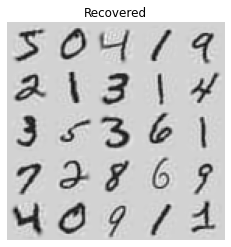

In [64]:
#Using PCA to compress MNIST
try:
    pca = PCA(n_components = 154)
    X_reduced = pca.fit_transform(X_train)
    X_recovered = pca.inverse_transform(X_reduced)
except ValueError:
    pca = PCA(n_components = 154)
    X_reduced = pca.fit_transform(X_train)
    X_recovered = pca.inverse_transform(X_reduced)

def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instances[i:i+1].reshape(size,size) for i in range(instances.shape[0])]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

fig = plt.figure(figsize=(12, 4))
compressed_images = X_recovered[:25]
plt.title("Recovered")
plot_digits(compressed_images, images_per_row=5)
plt.show()

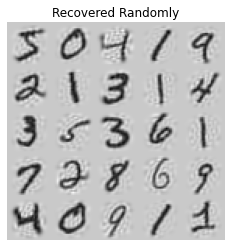

In [65]:
#Using a randomized PCA
#Note, setting to 'full' will force SciKit to do a full SVD even if the dimensionality of the data is greater than 500
try:
    rnd_pca = PCA(n_components=154, svd_solver="randomized")
    X_reduced = rnd_pca.fit_transform(X_train)
    X_recovered = pca.inverse_transform(X_reduced)
except ValueError:
    rnd_pca = PCA(n_components=154, svd_solver="randomized")
    X_reduced = rnd_pca.fit_transform(X_train)
    X_recovered = pca.inverse_transform(X_reduced)
fig = plt.figure(figsize=(12, 4))
compressed_images = X_recovered[:25]
plt.title("Recovered Randomly")
plot_digits(compressed_images, images_per_row=5)
plt.show()

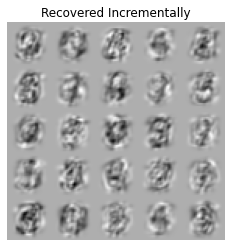

In [66]:
#Incremental with MNIST in tiny batches
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)

for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

fig = plt.figure(figsize=(12, 4))
compressed_images = X_recovered[:25]
plt.title("Recovered Incrementally")
plot_digits(compressed_images, images_per_row=5)
plt.show()

#Could also use NumPy and memmap for a binary file on disk
# X_mm = np.memmap(filename, dtype="float32", mode="readonly", shape=(m, n))
# batch_size = m // n_batches
# inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
# inc_pca.fit(X_mm)